In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input


In [2]:
with np.load('mnist.npz') as data:
    x_train = data['x_train']
    x_test = data['x_test']
    y_test = data['y_test']

In [3]:
#(x_train,_),(x_test,y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train,x_test = x_train.reshape(-1,784), x_test.reshape(-1,784)


In [4]:
inp = Input((784,))
enc = Dense(32,activation='relu')(inp)
dec = Dense(784,activation='sigmoid')(enc)
autoencoder = Model(inp,dec)
encoder=Model(inp,enc)

In [5]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [6]:
autoencoder.fit(x_train,x_train,epochs=5,validation_data=(x_test,x_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2244 - val_loss: 0.1141
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.1091 - val_loss: 0.0967
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0970 - val_loss: 0.0941
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0952 - val_loss: 0.0936
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0945 - val_loss: 0.0930


In [7]:
from sklearn.manifold import TSNE
encoded = encoder.predict(x_test)
x_2d = TSNE(n_components=2,random_state=42).fit_transform(encoded)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step


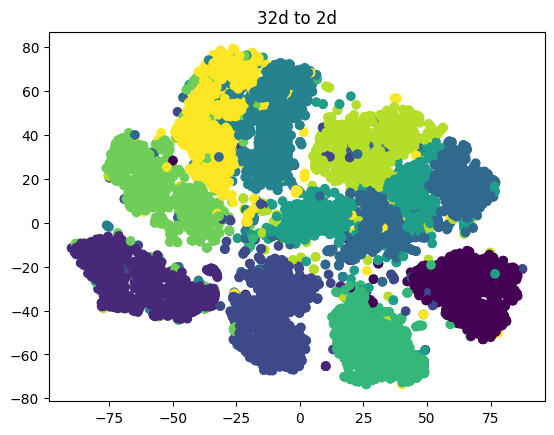

In [8]:
plt.scatter(x_2d[:,0],x_2d[:,1],c=y_test)
plt.title("32d to 2d")
plt.show()

In [9]:
decoded = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step


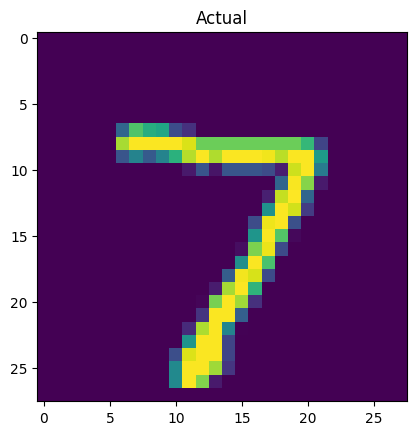

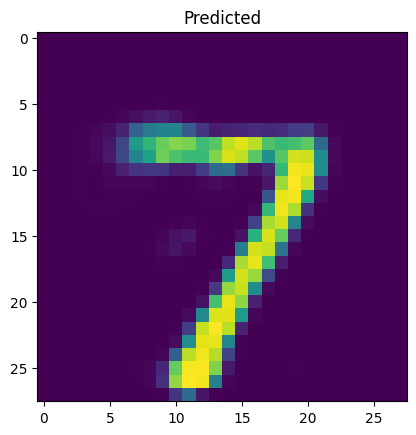

In [10]:
plt.title("Actual")
plt.imshow(x_test[0].reshape(28,28))
plt.show()

plt.title("Predicted")
plt.imshow(decoded[0].reshape(28,28))
plt.show()